In [1]:
import numpy as np
import random as rd
import time
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!wget https://raw.githubusercontent.com/lukipuki0/MCDP/main/instancias.txt

--2024-06-11 17:31:54--  https://raw.githubusercontent.com/lukipuki0/MCDP/main/instancias.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2017 (2.0K) [text/plain]
Saving to: ‘instancias.txt’

instancias.txt      100%[===================>]   1.97K  --.-KB/s    in 0s      

2024-06-11 17:31:54 (23.4 MB/s) - ‘instancias.txt’ saved [2017/2017]



In [3]:
def leer_matriz(filename, posicion=0):
    with open(filename, 'r') as file:
        # Saltar a la posición especificada en el archivo
        for _ in range(posicion):
            file.readline()

        # Leer la línea de dimensiones y variables
        primera_linea = file.readline().strip()
        if not primera_linea:
            return None, None, None, None, None, posicion

        filas, columnas, celdas, maxMPC = map(int, primera_linea.split(','))

        # Leer la matriz
        matriz = []
        for _ in range(filas):
            fila = list(map(int, file.readline().strip().split(',')))
            matriz.append(fila)

        # Convertir la matriz a np.array
        matriz = np.array(matriz)

        # Nueva posición en el archivo
        nueva_posicion = posicion + filas + 1

        return filas, columnas, celdas, maxMPC, matriz, nueva_posicion

# Uso del código
filename = 'instancias.txt'
posicion = 0

In [4]:
#leer instncias
posicion=0
#instancia 1
columnas, filas, celdas1, maxMPC1, matriz1, posicion = leer_matriz(filename, posicion)
maquinas1 = matriz1.shape[0]
piezas1 = matriz1.shape[1]

#instancia 2
columnas, filas, celdas2, maxMPC2, matriz2, posicion = leer_matriz(filename, posicion)
maquinas2 = matriz2.shape[0]
piezas2 = matriz2.shape[1]

#instancia 3
columnas, filas, celdas3, maxMPC3, matriz3, posicion = leer_matriz(filename, posicion)
maquinas3 = matriz3.shape[0]
piezas3 = matriz3.shape[1]

print("Instancia 1")
print("Matriz A")
print(matriz1)
print("")
print("Celdas:",celdas1)
print("Maquinas:",maquinas1)
print("piezas",piezas1)
print("Maximas maquinas por celda:", maxMPC1)
print("")

print("Instancia 2")
print("Matriz A")
print(matriz2)
print("")
print("Celdas:",celdas2)
print("Maquinas:",maquinas2)
print("piezas",piezas2)
print("Maximas maquinas por celda:", maxMPC2)
print("")

print("Instancia 3")
print("Matriz A")
print(matriz3)
print("")
print("Celdas:",celdas3)
print("Maquinas:",maquinas3)
print("piezas",piezas3)
print("Maximas maquinas por celda:", maxMPC3)
print("")

Instancia 1
Matriz A
[[1 1 1 0 1 0 0]
 [1 1 1 0 0 1 0]
 [0 0 1 1 0 1 1]
 [0 1 1 0 1 1 0]
 [1 1 0 1 1 0 0]]

Celdas: 2
Maquinas: 5
piezas 7
Maximas maquinas por celda: 3

Instancia 2
Matriz A
[[0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0]
 [0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1]
 [0 0 1 1 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1 1]
 [0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1]
 [1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1]
 [1 0 1 1 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1

In [20]:
def verificarMatrizB(B, maquinas, celdas, maxMPC):
    for i in range(celdas):
        aux = 0
        for j in range(maquinas):
            if B[j][i] == 1:
                aux += 1
        if aux == 0 or aux > maxMPC:
            return False
        for i in range(maquinas):
          aux = 0
          for j in range(celdas):
              if B[i][j] == 1:
                  aux += 1
          if aux > 1 or aux == 0:
              return False
    return True

def verificarMatrizC(C, piezas, celdas):
    for i in range(piezas):
        aux = 0
        for j in range(celdas):
            if C[i][j] == 1:
                aux += 1
        if aux > 1 or aux == 0:
            return False
    for j in range(celdas):
        aux = 0
        for i in range(piezas):
            if C[i][j] == 1:
                aux += 1
        if aux == 0:
            return False
    return True

def crearB(matrizA, celdas, maquinas, maxMPC):
    while True:
        B = np.zeros((maquinas, celdas), dtype=int)
        machine_loads = np.sum(matrizA, axis=0)
        sorted_indices = np.argsort(-machine_loads)
        for idx in range(maquinas):  # Asegúrate de que solo recorre el número de máquinas
            for attempt in range(10):
                cell = rd.randint(0, celdas-1)
                if np.sum(B[:, cell]) < maxMPC:
                    B[idx][cell] = 1
                    break
        esValida = verificarMatrizB(B, maquinas, celdas, maxMPC)
        if esValida:
            break
    return B

def crearC(matrizA, celdas, piezas):
    while True:
        C = np.zeros((piezas, celdas), dtype=int)
        part_similarity = np.sum(matrizA, axis=1)
        sorted_indices = np.argsort(-part_similarity)
        for idx in range(piezas):  # Asegúrate de que solo recorre el número de piezas
            for attempt in range(10):
                cell = rd.randint(0, celdas-1)
                if np.sum(C[:, cell]) < piezas / celdas:
                    C[idx][cell] = 1
                    break
        esValida = verificarMatrizC(C, piezas, celdas)
        if esValida:
            break
    return C

def calcular_funcion_objetivo(matrizA, matrizB, matrizC, C, M, P):
    total = 0
    for k in range(C):
        for i in range(M):
            for j in range(P):
                total += matrizA[i][j] * matrizC[j][k] * (1 - matrizB[i][k])
    return total

In [21]:
# Funciones algoritmo genético

def generar_poblacion_inicial(matrizA,tamaño, celdas, maquinas, maxMPC, piezas):
    poblacion = []
    for _ in range(tamaño):
        B = crearB(matrizA,celdas, maquinas, maxMPC)
        C = crearC(matrizA,celdas, piezas)
        fitness = calcular_funcion_objetivo(matrizA, B, C, celdas, maquinas, piezas)
        poblacion.append((B, C, fitness))
    return poblacion

def seleccionar_padres(poblacion):
    #seleccionar los dos mejores individuos como padres
    poblacion.sort(key=lambda x: x[2])
    return poblacion[:2]

def eliminar_padres(copia_poblacion, padres):
    for padre in padres:
        for i in range(len(copia_poblacion)):
            if (np.array_equal(copia_poblacion[i][0], padre[0]) and np.array_equal(copia_poblacion[i][1], padre[1])):
                del copia_poblacion[i]
                break
    return copia_poblacion

def cruce_dos_puntos(B1, C1, B2, C2, celdas, maquinas, piezas):
    # Selección de dos puntos de cruce aleatorios para las matrices B y C
    punto_cruce_B1 = rd.randint(0, maquinas - 2)
    punto_cruce_B2 = rd.randint(punto_cruce_B1 + 1, maquinas - 1)
    punto_cruce_C1 = rd.randint(0, piezas - 2)
    punto_cruce_C2 = rd.randint(punto_cruce_C1 + 1, piezas - 1)

    # Inicialización de las nuevas matrices B y C
    nuevo_B1 = np.zeros((maquinas, celdas), dtype=int)
    nuevo_B2 = np.zeros((maquinas, celdas), dtype=int)
    nuevo_C1 = np.zeros((piezas, celdas), dtype=int)
    nuevo_C2 = np.zeros((piezas, celdas), dtype=int)

    # Cruce en dos puntos para la matriz B
    for i in range(maquinas):
        if i < punto_cruce_B1 or i > punto_cruce_B2:
            nuevo_B1[i] = B1[i]
            nuevo_B2[i] = B2[i]
        else:
            nuevo_B1[i] = B2[i]
            nuevo_B2[i] = B1[i]

    # Cruce en dos puntos para la matriz C
    for i in range(piezas):
        if i < punto_cruce_C1 or i > punto_cruce_C2:
            nuevo_C1[i] = C1[i]
            nuevo_C2[i] = C2[i]
        else:
            nuevo_C1[i] = C2[i]
            nuevo_C2[i] = C1[i]

    return (nuevo_B1, nuevo_C1), (nuevo_B2, nuevo_C2)

def mutacion_columnas(B, C, celdas, maquinas, piezas, tasa_mutacion):
    auxB = B.copy()
    auxC = C.copy()
    for n in range(rd.randint(1, maquinas-1)):

        for i in range(celdas):
            if rd.random() < tasa_mutacion:
                punto_fila1 = rd.randint(0, maquinas - 1)
                punto_fila2 = rd.randint(0, maquinas - 1)

                # Intercambiar los valores en la columna i
                auxB[punto_fila1, i], auxB[punto_fila2, i] = B[punto_fila2, i], B[punto_fila1, i]

    for n in range(rd.randint(1, piezas-1)):
        for i in range(celdas):

            if rd.random() < tasa_mutacion:
                punto_fila1 = rd.randint(0, piezas - 1)
                punto_fila2 = rd.randint(0, piezas - 1)

                # Intercambiar los valores en la columna i
                auxC[punto_fila1, i], auxC[punto_fila2, i] = C[punto_fila2, i], C[punto_fila1, i]

    return auxB, auxC


def verificar_solucion(B, C, maquinas, piezas, celdas, maxMPC):
    #verificar si la soluciónes cumplen con las restricciones de la matriz B y C
    return verificarMatrizB(B, maquinas, celdas, maxMPC) and verificarMatrizC(C, piezas, celdas)

def reemplazo(poblacion, descendientes,POPULATION_SIZE):
    # Agrega los descendienets a la población y selecciona los mejores individuos
    poblacion.extend(descendientes)
    poblacion.sort(key=lambda x: x[2])
    return poblacion[:POPULATION_SIZE]


In [17]:
def Graficar_convergencia(fitness_generaciones):
 # Crear el gráfico
  plt.figure(figsize=(10, 6))
  plt.plot(fitness_generaciones, marker='o', linestyle='-')
  plt.title('Convergencia del Fitness a lo largo de las generaciones')
  plt.xlabel('Generaciones')
  plt.ylabel('Fitness')
  plt.ylim(bottom=0)
  plt.grid(True)
  plt.show()

In [22]:
def algoritmo_genetico(matrizA, celdas, maquinas, maxMPC, piezas, num_generaciones, pop_size, mutation_rate):

    fitness_generaciones = []
    poblacion = generar_poblacion_inicial(matrizA,pop_size, celdas, maquinas, maxMPC, piezas)

    for generacion in range(num_generaciones):

        descendientes = []
        poblacion_copia = poblacion.copy()

        for _ in range(pop_size // 2):

            padres = seleccionar_padres(poblacion_copia)

            poblacion_copia = eliminar_padres(poblacion_copia, padres)

            while True:

                (B1, C1), (B2, C2) = cruce_dos_puntos(padres[0][0], padres[0][1], padres[1][0], padres[1][1], celdas, maquinas, piezas)

                B1,C1 = mutacion_columnas(B1, C1, celdas, maquinas, piezas, mutation_rate)
                B2,C2 = mutacion_columnas(B2, C2, celdas, maquinas, piezas, mutation_rate)

                if verificar_solucion(B1, C1, maquinas, piezas, celdas, maxMPC) and verificar_solucion(B2, C2, maquinas, piezas, celdas, maxMPC):
                    break

            fitness1 = calcular_funcion_objetivo(matrizA, B1, C1, celdas, maquinas, piezas)
            fitness2 = calcular_funcion_objetivo(matrizA, B2, C2, celdas, maquinas, piezas)
            descendientes.append((B1, C1, fitness1))
            descendientes.append((B2, C2, fitness2))

        poblacion = reemplazo(poblacion, descendientes,pop_size)

        mejor_individuo = poblacion[0]
        fitness_generaciones.append(mejor_individuo[2])

        print(f"Generación {generacion + 1}: Mejor valor objetivo = {mejor_individuo[2]}")

    return mejor_individuo, fitness_generaciones


Resultado fuerza bruta:valor de la función objetivo es: 10
Generación 1: Mejor valor objetivo = 7
Generación 2: Mejor valor objetivo = 6
Generación 3: Mejor valor objetivo = 6
Generación 4: Mejor valor objetivo = 6
Generación 5: Mejor valor objetivo = 6
Generación 6: Mejor valor objetivo = 6
Generación 7: Mejor valor objetivo = 6
Generación 8: Mejor valor objetivo = 6
Generación 9: Mejor valor objetivo = 6
Generación 10: Mejor valor objetivo = 6
Generación 11: Mejor valor objetivo = 5
Generación 12: Mejor valor objetivo = 5
Generación 13: Mejor valor objetivo = 5
Generación 14: Mejor valor objetivo = 5
Generación 15: Mejor valor objetivo = 5
Generación 16: Mejor valor objetivo = 5
Generación 17: Mejor valor objetivo = 5
Generación 18: Mejor valor objetivo = 5
Generación 19: Mejor valor objetivo = 5
Generación 20: Mejor valor objetivo = 5
Generación 21: Mejor valor objetivo = 5
Generación 22: Mejor valor objetivo = 5
Generación 23: Mejor valor objetivo = 5
Generación 24: Mejor valor obj

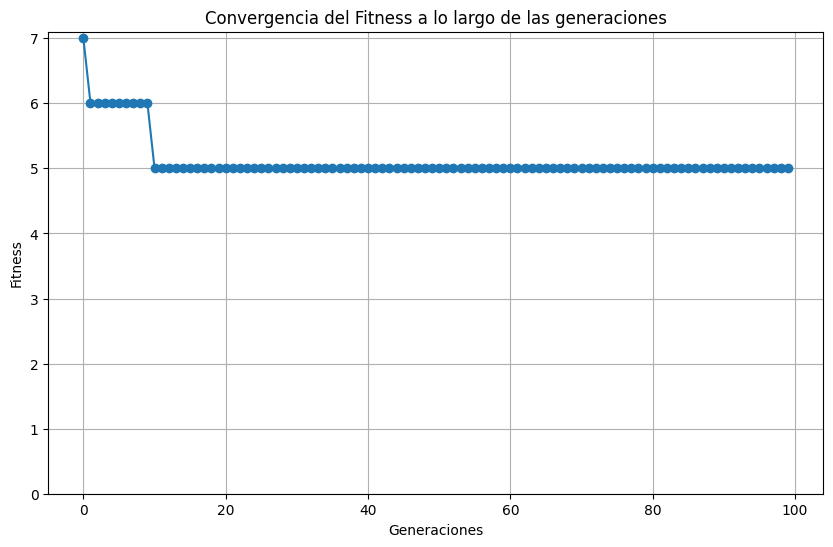

In [44]:
#instancia 1
matrizA=matriz1
celdas=celdas1
maquinas=maquinas1
maxMPC=maxMPC1
piezas=piezas1
NUM_GENERATIONS = 100
POPULATION_SIZE = 50
MUTATION_RATE = 0.15

# Instancia fuerza bruta
matrizB = crearB(matrizA,celdas, maquinas, maxMPC)
matrizC = crearC(matrizA,celdas, piezas)

valor_objetivo = calcular_funcion_objetivo(matrizA, matrizB, matrizC, celdas, maquinas, piezas)
print(f"Resultado fuerza bruta:valor de la función objetivo es: {valor_objetivo}")

tiempo_inicial=time.time()

# Ejecución de la Instancia 1
mejor_individuo, fitness_generaciones = algoritmo_genetico(matrizA, celdas, maquinas, maxMPC, piezas, NUM_GENERATIONS, POPULATION_SIZE, MUTATION_RATE)

tiempo_final=time.time()
tiempo_ejecucion=tiempo_final-tiempo_inicial

tiempo_final=time.time()
tiempo_ejecucion=tiempo_final-tiempo_inicial
# Resultado final
print(matrizA)
print("Mejor individuo final:")
print("Matriz B:")
print(mejor_individuo[0])
print("Matriz C:")
print(mejor_individuo[1])
print(f"Mejor valor de la función objetivo: {mejor_individuo[2]}")
print("Tiempo de ejecuciion",tiempo_ejecucion)
Graficar_convergencia(fitness_generaciones)

Resultado fuerza bruta:valor de la función objetivo es: 65
Generación 1: Mejor valor objetivo = 44
Generación 2: Mejor valor objetivo = 44
Generación 3: Mejor valor objetivo = 44
Generación 4: Mejor valor objetivo = 44
Generación 5: Mejor valor objetivo = 43
Generación 6: Mejor valor objetivo = 43
Generación 7: Mejor valor objetivo = 43
Generación 8: Mejor valor objetivo = 38
Generación 9: Mejor valor objetivo = 36
Generación 10: Mejor valor objetivo = 36
Generación 11: Mejor valor objetivo = 36
Generación 12: Mejor valor objetivo = 36
Generación 13: Mejor valor objetivo = 31
Generación 14: Mejor valor objetivo = 30
Generación 15: Mejor valor objetivo = 27
Generación 16: Mejor valor objetivo = 21
Generación 17: Mejor valor objetivo = 20
Generación 18: Mejor valor objetivo = 20
Generación 19: Mejor valor objetivo = 20
Generación 20: Mejor valor objetivo = 20
Generación 21: Mejor valor objetivo = 20
Generación 22: Mejor valor objetivo = 20
Generación 23: Mejor valor objetivo = 20
Generac

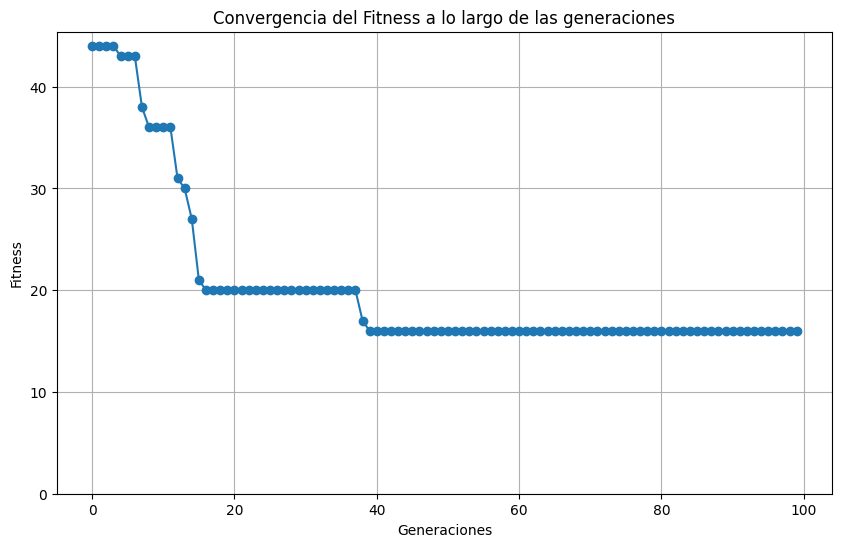

In [39]:
#instancia 2
matrizA=matriz2
celdas=celdas2
maquinas=maquinas2
maxMPC=maxMPC2
piezas=piezas2
NUM_GENERATIONS = 100
POPULATION_SIZE = 50
MUTATION_RATE = 0.15
# Instancia fuerza bruta
matrizB = crearB(matrizA,celdas, maquinas, maxMPC)
matrizC = crearC(matrizA,celdas, piezas)

valor_objetivo = calcular_funcion_objetivo(matrizA, matrizB, matrizC, celdas, maquinas, piezas)
print(f"Resultado fuerza bruta:valor de la función objetivo es: {valor_objetivo}")

tiempo_inicial=time.time()

# Ejecución de la Instancia 2
mejor_individuo, fitness_generaciones = algoritmo_genetico(matrizA, celdas, maquinas, maxMPC, piezas, NUM_GENERATIONS, POPULATION_SIZE, MUTATION_RATE)

tiempo_final=time.time()
tiempo_ejecucion=tiempo_final-tiempo_inicial


print(matrizA)
print("Mejor individuo final:")
print("Matriz B:")
print(mejor_individuo[0])
print("Matriz C:")
print(mejor_individuo[1])
print(f"Mejor valor de la función objetivo: {mejor_individuo[2]}")
print("Tiempo de ejecuciion",tiempo_ejecucion)
Graficar_convergencia(fitness_generaciones)


Resultado fuerza bruta:valor de la función objetivo es: 58
Generación 1: Mejor valor objetivo = 40
Generación 2: Mejor valor objetivo = 40
Generación 3: Mejor valor objetivo = 38
Generación 4: Mejor valor objetivo = 38
Generación 5: Mejor valor objetivo = 38
Generación 6: Mejor valor objetivo = 33
Generación 7: Mejor valor objetivo = 29
Generación 8: Mejor valor objetivo = 29
Generación 9: Mejor valor objetivo = 28
Generación 10: Mejor valor objetivo = 25
Generación 11: Mejor valor objetivo = 22
Generación 12: Mejor valor objetivo = 17
Generación 13: Mejor valor objetivo = 17
Generación 14: Mejor valor objetivo = 17
Generación 15: Mejor valor objetivo = 16
Generación 16: Mejor valor objetivo = 14
Generación 17: Mejor valor objetivo = 11
Generación 18: Mejor valor objetivo = 11
Generación 19: Mejor valor objetivo = 11
Generación 20: Mejor valor objetivo = 9
Generación 21: Mejor valor objetivo = 9
Generación 22: Mejor valor objetivo = 9
Generación 23: Mejor valor objetivo = 9
Generación 

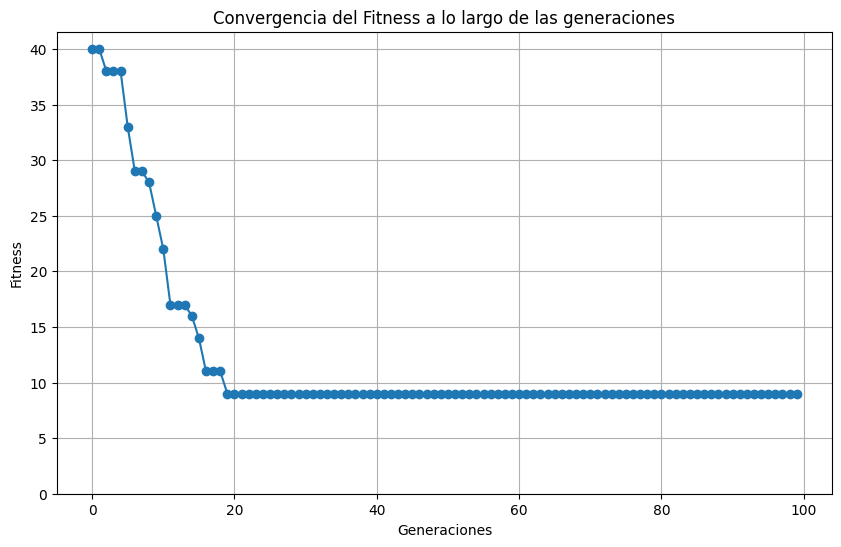

In [36]:
#instancia 3
matrizA=matriz3
celdas=celdas3
maquinas=maquinas3
maxMPC=maxMPC3
piezas=piezas3
NUM_GENERATIONS = 100
POPULATION_SIZE = 50
MUTATION_RATE = 0.15

# Instancia fuerza bruta
matrizB = crearB(matrizA,celdas, maquinas, maxMPC)
matrizC = crearC(matrizA,celdas, piezas)

valor_objetivo = calcular_funcion_objetivo(matrizA, matrizB, matrizC, celdas, maquinas, piezas)
print(f"Resultado fuerza bruta:valor de la función objetivo es: {valor_objetivo}")

tiempo_inicial=time.time()

# Ejecución de la Instancia 3
mejor_individuo, fitness_generaciones = algoritmo_genetico(matrizA, celdas, maquinas, maxMPC, piezas, NUM_GENERATIONS, POPULATION_SIZE, MUTATION_RATE)

tiempo_final=time.time()
tiempo_ejecucion=tiempo_final-tiempo_inicial


print("Matriz A:")
print(matrizA)
print("Mejor individuo final:")
print("Matriz B:")
print(mejor_individuo[0])
print("Matriz C:")
print(mejor_individuo[1])
print(f"Mejor valor de la función objetivo: {mejor_individuo[2]}")
print("Tiempo de ejecuciion",tiempo_ejecucion)
Graficar_convergencia(fitness_generaciones)